In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
# from MyFunc import sigmoid

In [78]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [79]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 150

In [80]:
df = pd.read_csv('/Users/huy/Documents/MÁY HỌC THỐNG KÊ/data (3)/Insurance.csv')

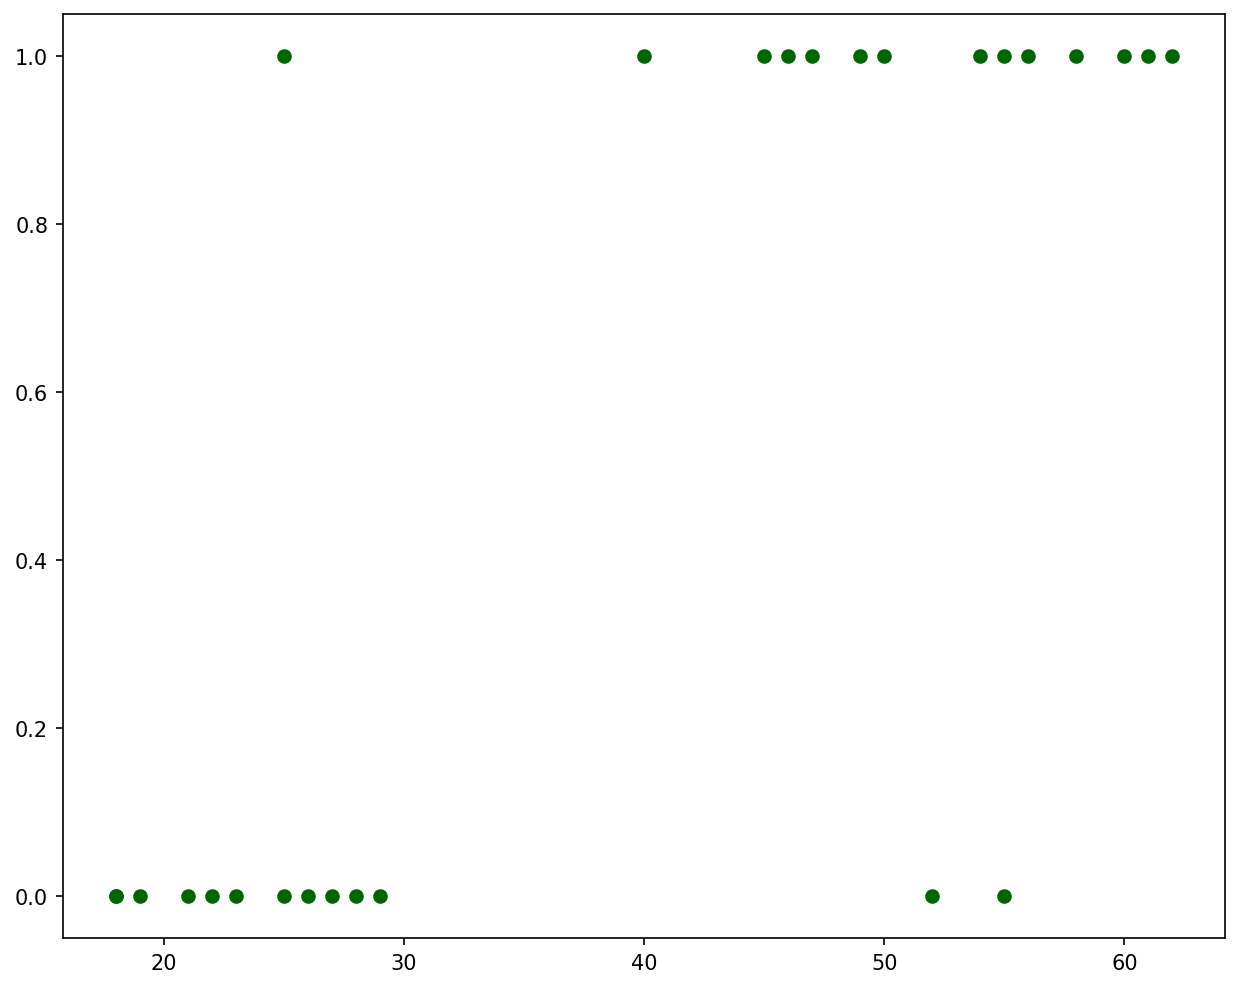

In [81]:
plt.scatter(df.age, df.bought_insurance, color='darkgreen', marker='o')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [84]:
intercept = model.intercept_
coefs = model.coef_
score = model.score(X_train, y_train)
prob_matrix = model.predict_proba(X_train)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)

[[ 9  2]
 [ 1 12]]


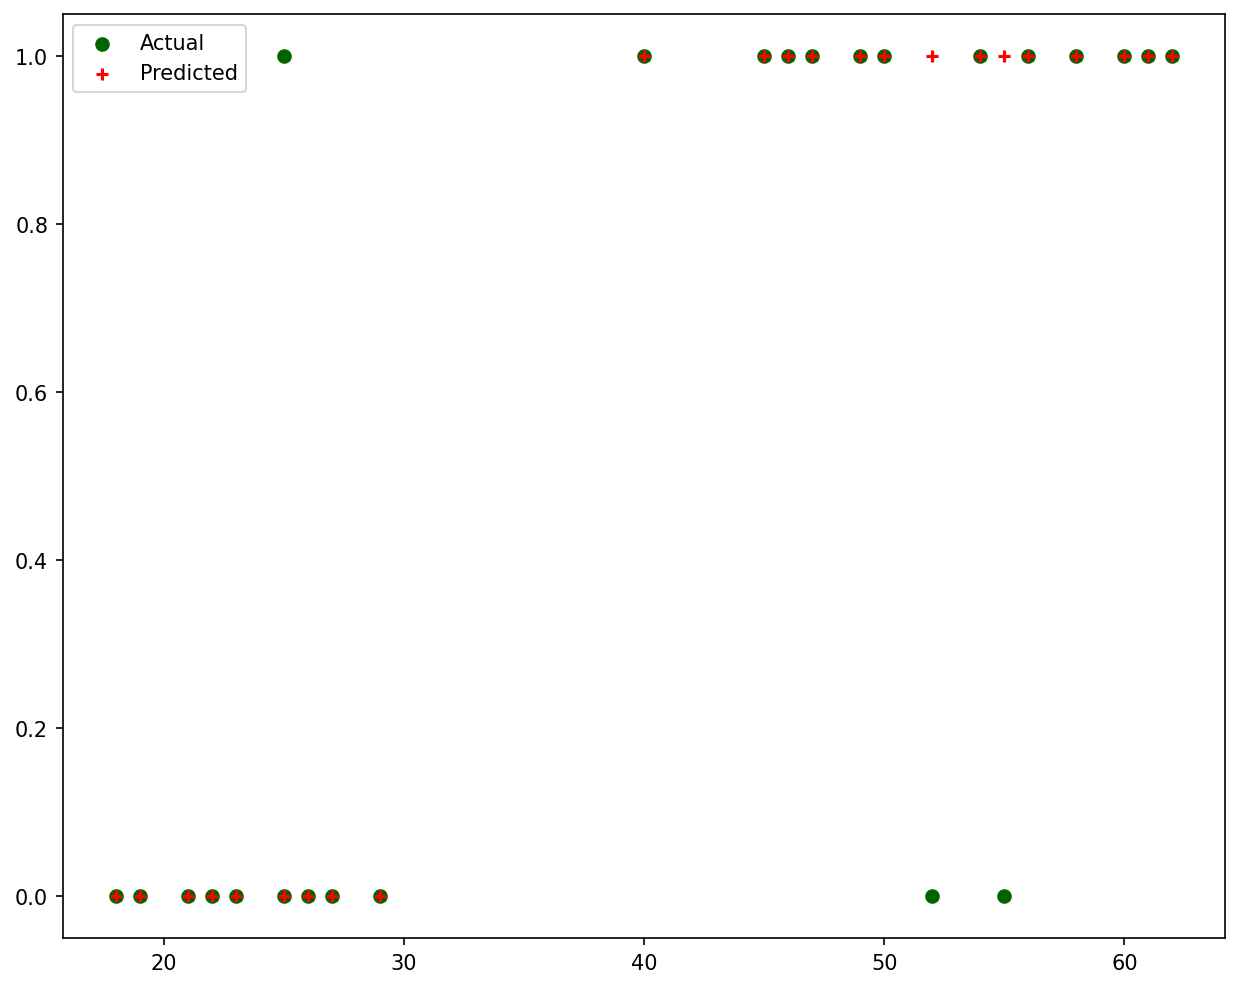

In [86]:
plt.scatter(X_train, y_train, color='darkgreen', marker='o',label='Actual')
plt.scatter(X_train, y_pred, color='red', marker='+',label='Predicted')
plt.legend()
plt.show()

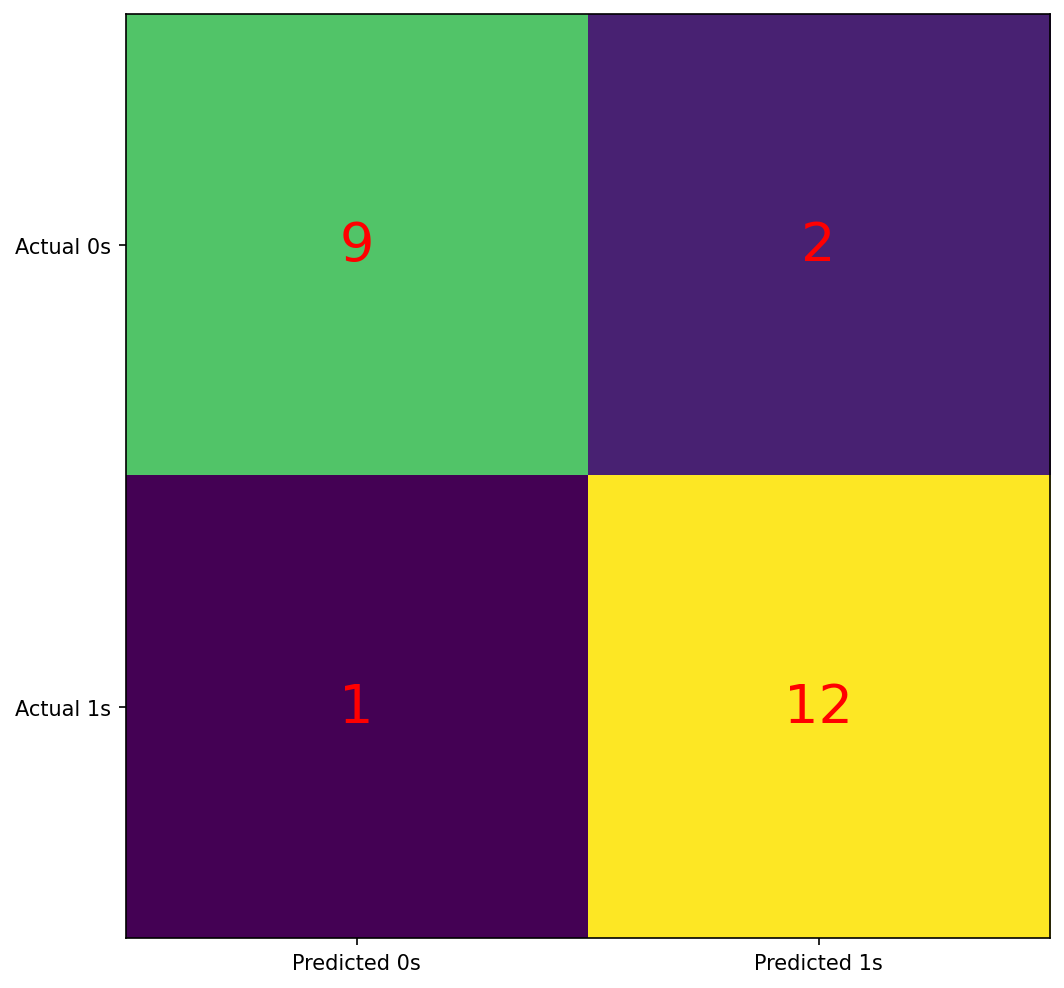

In [87]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='#FF0000',
        fontsize=26)

plt.show()

In [88]:
pred_values = model.predict(X_test)
pred_score = model.score(X_test, y_test)
pred_prob_matrix = model.predict_proba(X_test)

In [89]:
def prediction_func(age, inter, coef):
    x = inter + coef * age
    return sigmoid(x)


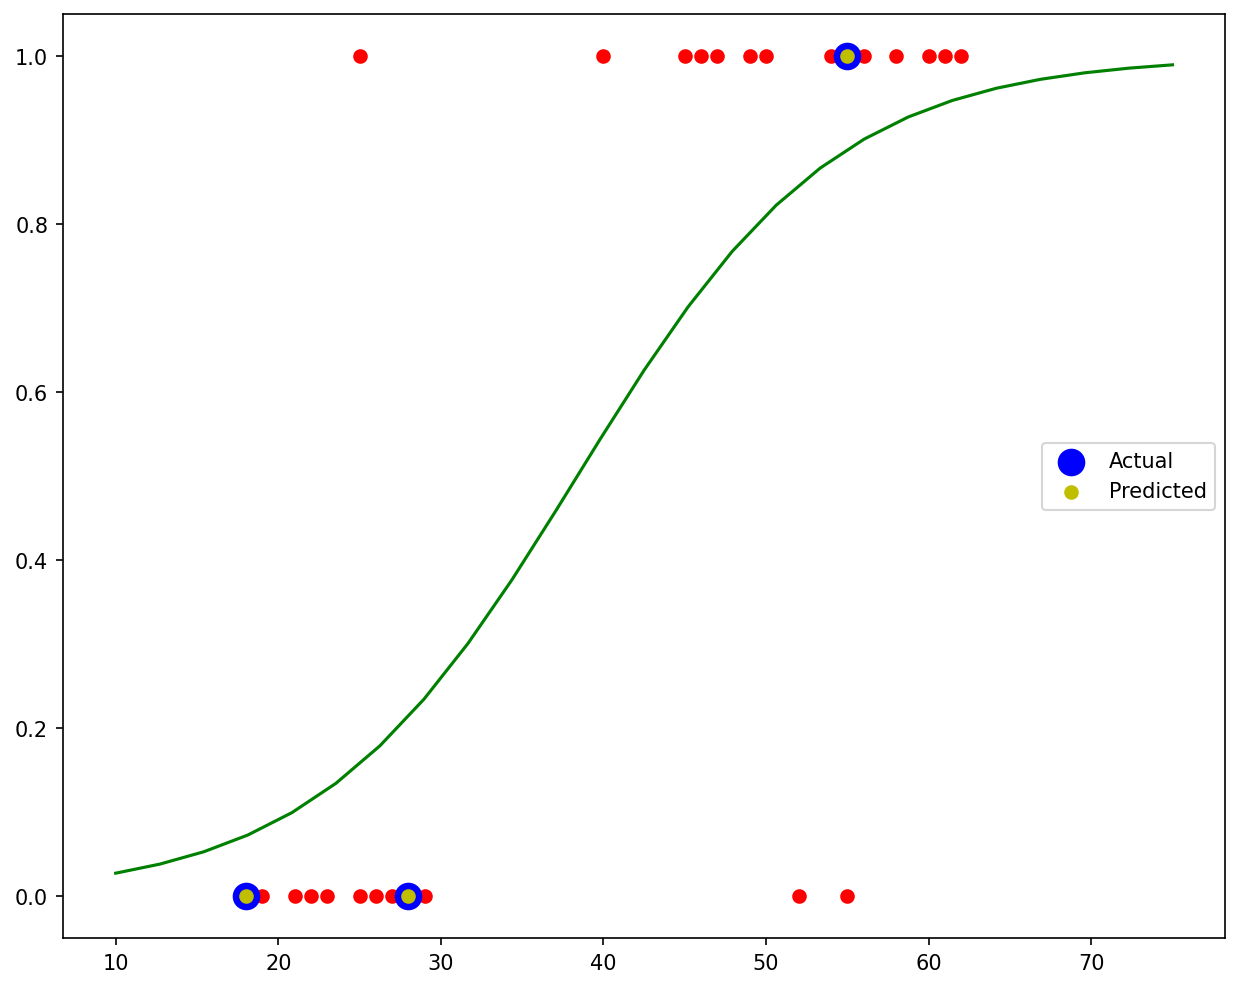

In [90]:
plt.scatter(X_train, y_train, color='r', marker='o')
x_test = np.linspace(10, 75, 25)
sigs = []
inte = intercept[0]
co = coefs[0][0]
for item in x_test:
    
    sigs.append(prediction_func(item, intercept[0], coefs[0][0]))
plt.plot(x_test, sigs, color='g')
plt.scatter(X_test, y_test, color='b', s = 150, label = 'Actual')
plt.scatter(X_test, pred_values, color='y', label = 'Predicted')
plt.legend(loc='center right')
plt.show()
    

In [91]:
df_titanic = pd.read_csv('data (3)/Titanic.csv')

/var/folders/sc/09_755c96_5cwxwdx8y9kscm0000gn/T/ipykernel_52865/2536670882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)
/var/folders/sc/09_755c96_5cwxwdx8y9kscm0000gn/T/ipykernel_52865/2536670882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

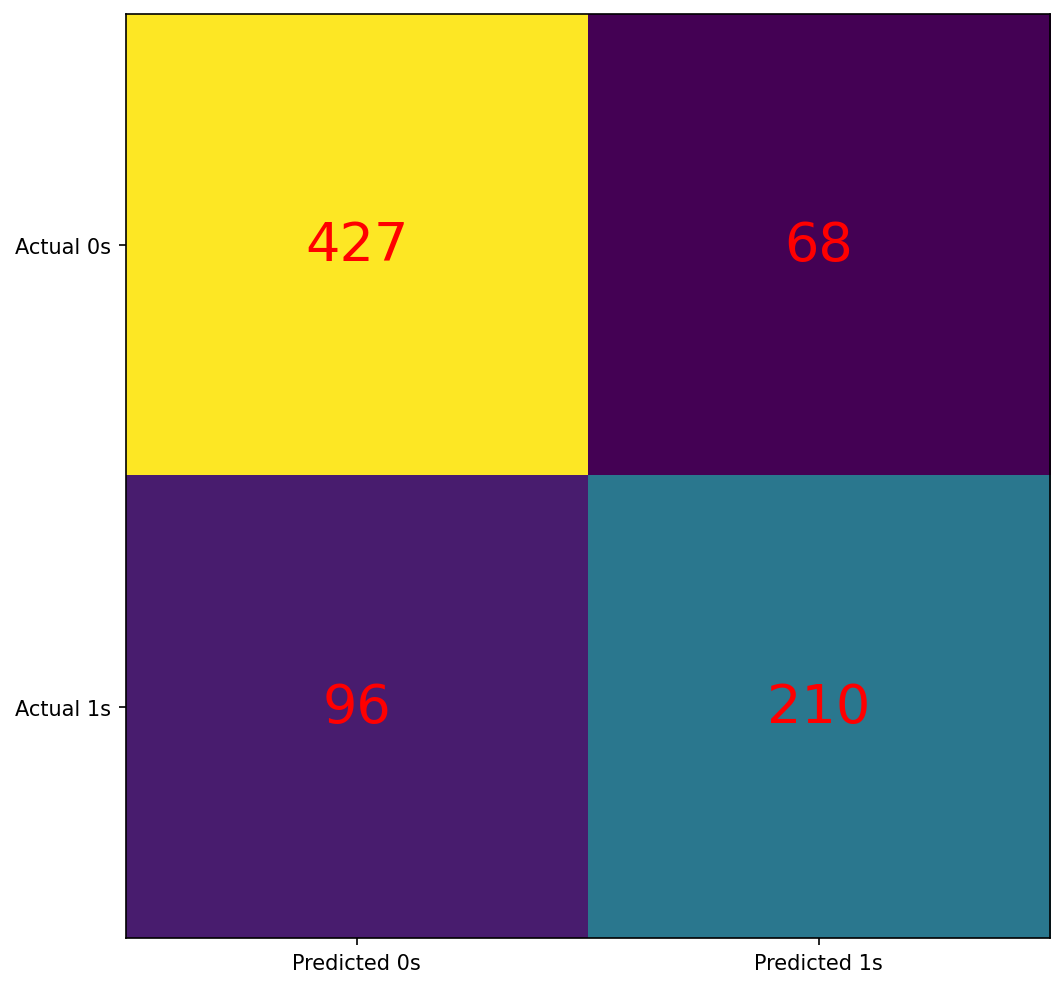

In [92]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic['Embarked'].fillna('S', inplace=True)
df_titanic['Embarked'] = df_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_titanic = df_titanic[['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_titanic = df_titanic['Survived']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.1, random_state=42)

model_titanic = LogisticRegression(max_iter=200).fit(X_train_titanic, y_train_titanic)

intercept_titanic = model_titanic.intercept_
coefs_titanic = model_titanic.coef_
score_titanic = model_titanic.score(X_train_titanic, y_train_titanic)
prob_matrix_titanic = model_titanic.predict_proba(X_train_titanic)

y_pred_titanic = model_titanic.predict(X_train_titanic)
cm_titanic = confusion_matrix(y_train_titanic, y_pred_titanic)

fig, ax = plt.subplots()
ax.imshow(cm_titanic)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_titanic[i, j], ha='center', va='center', color='#FF0000', fontsize=26)

plt.show()

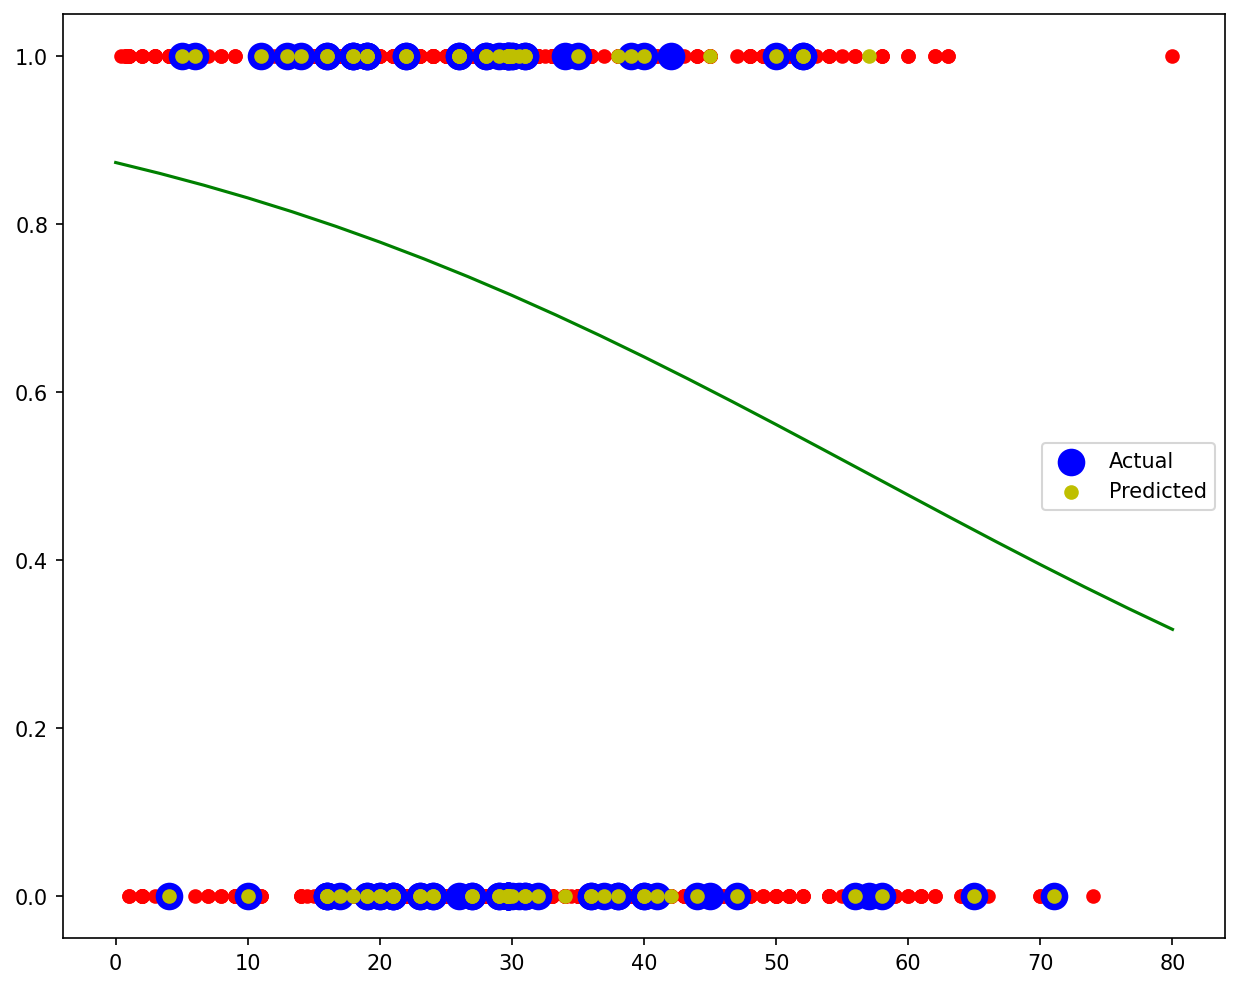

In [93]:
pred_values_titanic = model_titanic.predict(X_test_titanic)
pred_score_titanic = model_titanic.score(X_test_titanic, y_test_titanic)
pred_prob_matrix_titanic = model_titanic.predict_proba(X_test_titanic)

plt.scatter(X_train_titanic['Age'], y_train_titanic, color='r', marker='o')
x_test_titanic = np.linspace(0, 80, 25)
sigs_titanic = []
inte_titanic = intercept_titanic[0]
co_titanic = coefs_titanic[0][0]
for item in x_test_titanic:
    sigs_titanic.append(prediction_func(item, intercept_titanic[0], coefs_titanic[0][0]))
plt.plot(x_test_titanic, sigs_titanic, color='g')
plt.scatter(X_test_titanic['Age'], y_test_titanic, color='b', s=150, label='Actual')
plt.scatter(X_test_titanic['Age'], pred_values_titanic, color='y', label='Predicted')
plt.legend(loc='center right')
plt.show()